In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [3]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [4]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [5]:
# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 20) # 20 epochs patience
hist = model.fit(x_train, y_train, epochs=3000, batch_size=10, validation_data=(x_val, y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 1s 2ms/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s 212us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s 195us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 213us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 201us/step - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s 200us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s 190us/step - loss: 2.0721 - acc: 0.2071 - val_loss: 2.0727 - val_acc: 0.2067
Epoc

700/700 [==============================] - 0s 193us/step - loss: 1.7552 - acc: 0.2614 - val_loss: 1.8256 - val_acc: 0.2500
Epoch 61/3000
700/700 [==============================] - 0s 209us/step - loss: 1.7566 - acc: 0.2814 - val_loss: 1.8336 - val_acc: 0.2400
Epoch 62/3000
700/700 [==============================] - 0s 191us/step - loss: 1.7531 - acc: 0.2729 - val_loss: 1.8312 - val_acc: 0.2267
Epoch 63/3000
700/700 [==============================] - 0s 196us/step - loss: 1.7505 - acc: 0.2857 - val_loss: 1.8299 - val_acc: 0.2000
Epoch 64/3000
700/700 [==============================] - 0s 183us/step - loss: 1.7484 - acc: 0.2800 - val_loss: 1.8268 - val_acc: 0.2200
Epoch 65/3000
700/700 [==============================] - 0s 198us/step - loss: 1.7457 - acc: 0.2814 - val_loss: 1.8298 - val_acc: 0.2033
Epoch 66/3000
700/700 [==============================] - 0s 188us/step - loss: 1.7439 - acc: 0.2786 - val_loss: 1.8296 - val_acc: 0.2067
Epoch 67/3000
700/700 [==============================] 

Epoch 120/3000
700/700 [==============================] - 0s 190us/step - loss: 1.6661 - acc: 0.3129 - val_loss: 1.8219 - val_acc: 0.2200
Epoch 121/3000
700/700 [==============================] - 0s 191us/step - loss: 1.6646 - acc: 0.3071 - val_loss: 1.8132 - val_acc: 0.2233
Epoch 122/3000
700/700 [==============================] - 0s 204us/step - loss: 1.6637 - acc: 0.3229 - val_loss: 1.8194 - val_acc: 0.2200
Epoch 123/3000
700/700 [==============================] - 0s 176us/step - loss: 1.6629 - acc: 0.3100 - val_loss: 1.8139 - val_acc: 0.2200
Epoch 124/3000
700/700 [==============================] - 0s 194us/step - loss: 1.6619 - acc: 0.3143 - val_loss: 1.8187 - val_acc: 0.2267
Epoch 125/3000
700/700 [==============================] - 0s 191us/step - loss: 1.6606 - acc: 0.3257 - val_loss: 1.8212 - val_acc: 0.2333


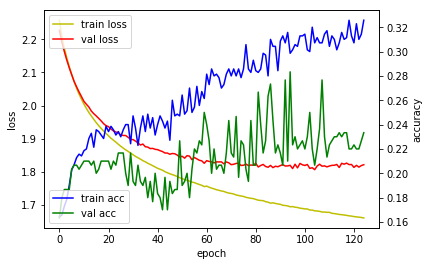

In [6]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [7]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 21us/step

loss : 1.841643052482605
accuracy : 0.2717
